In [1]:
import scipy.interpolate as itp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob,csv
import scipy.io
import netCDF4 as nc
import os
%matplotlib inline

In [2]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/test/EXP00/1yr/*.nc'))
data=nc.Dataset(nc_filename[1])
dep= data.variables['deptht'];

In [3]:
def writecsv(j):
    for k in range (len(yinterp2)):
    #print k,yinterp2[k],xvals[k]
        for num in range(len(dep)):
            depth_min=dep[num]-1;
            depth_max=dep[num]+1;

            if (xvals[k]>depth_min)&(xvals[k]<depth_max):
                layer[num,j]=num;
                NEMO_dep[num,j]=dep[num];
                Real_dep[num,j]=xvals[k];
                z[num,j]=yinterp2[k];
                lons[num,j]=lon[0]
                lats[num,j]=lat[0]

#Vertical Pa part. Interpolation_spline

In [4]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/Pa_part/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))
print len(nc_filename)

found *.csv file: 
['/ocean/xiaoxiny/research/data/Pa_part/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/60changed6.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/IC_d_p_32_1.csv', '/ocean/xiaoxiny/research/data/Pa_part/abondant_60changed5.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv']
7


In [5]:
total=sorted(glob.glob('/ocean/xiaoxiny/research/data/total/*.csv'))
print("found *.csv file: \n{}".format(total))
print len(total)

found *.csv file: 
['/ocean/xiaoxiny/research/data/total/Total70.csv', '/ocean/xiaoxiny/research/data/total/Total73.csv', '/ocean/xiaoxiny/research/data/total/Total80.csv', '/ocean/xiaoxiny/research/data/total/Total83.csv', '/ocean/xiaoxiny/research/data/total/Total90.csv', '/ocean/xiaoxiny/research/data/total/Total_r1.csv', '/ocean/xiaoxiny/research/data/total/Total_r2.csv', '/ocean/xiaoxiny/research/data/total/Total_r3.csv', '/ocean/xiaoxiny/research/data/total/Total_r4.csv', '/ocean/xiaoxiny/research/data/total/Total_r5.csv', '/ocean/xiaoxiny/research/data/total/Total_r6.csv']
11


In [6]:
a=len(nc_filename)+len(total)
print a
layer=np.empty([31,a])
NEMO_dep=np.empty([31,a])
Real_dep=np.empty([31,a])
lons=np.empty([31,a])
lats=np.empty([31,a])
z=np.empty([31,a])

18


In [7]:
grid=nc.Dataset('/ocean/xiaoxiny/research/data/Jasper/ANHA4_IC_T.nc')
dep=grid.variables['deptht']
depmax=np.max(dep[:])

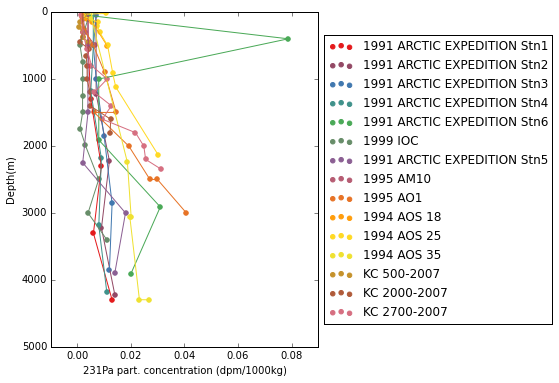

In [52]:
#for plot
import matplotlib.cm as cm
layer=np.empty([31,len(nc_filename)])
NEMO_dep=np.empty([31,len(nc_filename)])
Real_dep=np.empty([31,len(nc_filename)])
lons=np.empty([31,len(nc_filename)])
lats=np.empty([31,len(nc_filename)])
z=np.empty([31,len(nc_filename)])

for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    x= data['depth'];
    y=data['231Pa part.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    #name= data['name'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()

    
    xvals=np.linspace(0,np.max(x),3000)

    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(6,6))
    ax.hold(True)
    ax = plt.subplot()#4,4,j+1)
    ax.scatter(y,x, color=cm.Set1(j*15),label=name)
    ax.plot(yinterp2,xvals,color=cm.Set1(j*15))
    #plt.xlabel('231Pa part. concentration')
    #plt.ylabel('Depth')
    #plt.ylim([0,depmax])
for j in range(len(total)):
    
    data=pd.read_csv(total[j])
    x= data['depth'];
    y=data['231 tot.']*0.1;
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    #name= data['name'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()
    if len(x)!=0:
        xvals=np.linspace(0,np.max(x),3000)
        yinterp2 = np.interp(xvals, x, y)
    
        ax = plt.figure(1,figsize=(5,5))
        ax.hold(True)
        ax = plt.subplot()#4,4,j+1)
        ax.scatter(y,x,color=cm.Set1((j+len(nc_filename))*15),label=name)
        ax.plot(yinterp2,xvals,color=cm.Set1((j+len(nc_filename))*15))
plt.xlabel('231Pa part. concentration (dpm/1000kg)')
plt.ylabel('Depth(m)')
plt.ylim([0,5000])
#writecsv(j)

plt.legend(loc=0)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.gca().invert_yaxis()
plt.show()

#Vertical Pa diss. Interpolation_spline

In [53]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/Pa_diss/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))
print len(nc_filename)

total=sorted(glob.glob('/ocean/xiaoxiny/research/data/total/*.csv'))
print("found *.csv file: \n{}".format(total))
print len(total)

a=len(nc_filename)+len(total)
print a
layer=np.empty([31,a])
NEMO_dep=np.empty([31,a])
Real_dep=np.empty([31,a])
lons=np.empty([31,a])
lats=np.empty([31,a])
z=np.empty([31,a])

found *.csv file: 
['/ocean/xiaoxiny/research/data/Pa_diss/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/60changed6.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/IC_d_1_ref5.csv', '/ocean/xiaoxiny/research/data/Pa_diss/IC_d_p_32_1.csv', '/ocean/xiaoxiny/research/data/Pa_diss/abundant_60changed5.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv']
8
found *.csv file: 
['/ocean/xiaoxiny/research/data/total/Total70.csv', '/ocean/xiaoxiny/research/data/total/Total73.csv', '/ocean/xiaoxiny/research/data/total/Total80.csv', '/ocean/xiaoxiny/resear

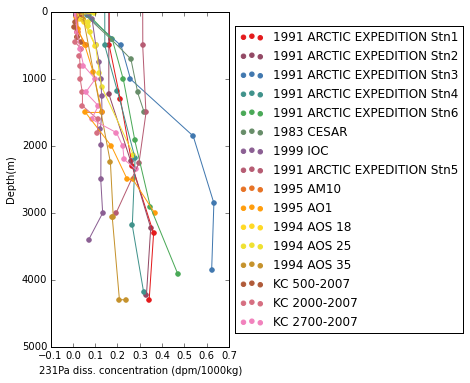

In [54]:
#for plot
import matplotlib.cm as cm
layer=np.empty([31,len(nc_filename)])
NEMO_dep=np.empty([31,len(nc_filename)])
Real_dep=np.empty([31,len(nc_filename)])
lons=np.empty([31,len(nc_filename)])
lats=np.empty([31,len(nc_filename)])
z=np.empty([31,len(nc_filename)])

for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    x= data['depth'];
    y=data['231Pa diss.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    #name= data['name'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()

    
    xvals=np.linspace(0,np.max(x),3000)

    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(4,6))
    ax.hold(True)
    ax = plt.subplot()#4,4,j+1)
    ax.scatter(y,x, color=cm.Set1(j*15),label=name)
    ax.plot(yinterp2,xvals,color=cm.Set1(j*15))
    #plt.xlabel('231Pa part. concentration')
    #plt.ylabel('Depth')
    #plt.ylim([0,depmax])
for j in range(len(total)):
    
    data=pd.read_csv(total[j])
    x= data['depth'];
    y=data['231 tot.']*0.9;
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    #name= data['name'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()
    if len(x)!=0:
        xvals=np.linspace(0,np.max(x),3000)
        yinterp2 = np.interp(xvals, x, y)
    
        ax = plt.figure(1,figsize=(5,5))
        ax.hold(True)
        ax = plt.subplot()#4,4,j+1)
        ax.scatter(y,x,color=cm.Set1((j+len(nc_filename))*15),label=name)
        ax.plot(yinterp2,xvals,color=cm.Set1((j+len(nc_filename))*15))
plt.xlabel('231Pa diss. concentration (dpm/1000kg)')
plt.ylabel('Depth(m)')
plt.ylim([0,5000])

plt.legend(loc=0)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#writecsv(j)

plt.gca().invert_yaxis()
plt.show()

#Vertical Th part. Interpolation_spline&linear

In [60]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/Th_part/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))
print len(nc_filename)

total=sorted(glob.glob('/ocean/xiaoxiny/research/data/total/*.csv'))
print("found *.csv file: \n{}".format(total))
print len(total)

a=len(nc_filename)+len(total)
print a
layer=np.empty([31,a])
NEMO_dep=np.empty([31,a])
Real_dep=np.empty([31,a])
lons=np.empty([31,a])
lats=np.empty([31,a])
z=np.empty([31,a])

found *.csv file: 
['/ocean/xiaoxiny/research/data/Th_part/1_ref5.csv', '/ocean/xiaoxiny/research/data/Th_part/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed5.Th-Pa_data_July2012-Oce

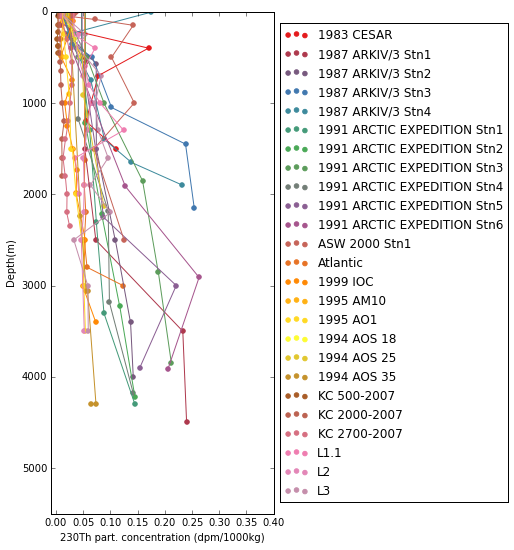

In [62]:
#for plot
import matplotlib.cm as cm
layer=np.empty([31,len(nc_filename)])
NEMO_dep=np.empty([31,len(nc_filename)])
Real_dep=np.empty([31,len(nc_filename)])
lons=np.empty([31,len(nc_filename)])
lats=np.empty([31,len(nc_filename)])
z=np.empty([31,len(nc_filename)])

for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    x= data['depth'];
    y=data['230Th part.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    #name= data['name'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()

    
    xvals=np.linspace(0,np.max(x),3000)

    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(5,9))
    ax.hold(True)
    ax = plt.subplot()#4,4,j+1)
    ax.scatter(y,x, color=cm.Set1(j*10),label=name)
    ax.plot(yinterp2,xvals,color=cm.Set1(j*10))
    #plt.xlabel('231Pa part. concentration')
    #plt.ylabel('Depth')
    #plt.ylim([0,depmax])
for j in range(len(total)):
    
    data=pd.read_csv(total[j])
    x= data['depth'];
    y=data['230Th tot.']*0.1;
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    #name= data['name'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()
    if len(x)!=0:
        xvals=np.linspace(0,np.max(x),3000)
        yinterp2 = np.interp(xvals, x, y)
    
        ax = plt.figure(1,figsize=(5,5))
        ax.hold(True)
        ax = plt.subplot()#4,4,j+1)
        ax.scatter(y,x,color=cm.Set1((j+len(nc_filename))*10),label=name)
        ax.plot(yinterp2,xvals,color=cm.Set1((j+len(nc_filename))*10))
    if len(x)==0:
        print j
plt.xlabel('230Th part. concentration (dpm/1000kg)')
plt.ylabel('Depth(m)')
plt.ylim([0,5500])
plt.xlim([-0.01,0.4])
#writecsv(j)
plt.legend(loc=0)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_yaxis()
plt.show()

#Vertical Th diss. Interpolation_spline&linear

In [63]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/Th_diss/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))
print len(nc_filename)

total=sorted(glob.glob('/ocean/xiaoxiny/research/data/total/*.csv'))
print("found *.csv file: \n{}".format(total))
print len(total)

a=len(nc_filename)+len(total)
print a
layer=np.empty([31,a])
NEMO_dep=np.empty([31,a])
Real_dep=np.empty([31,a])
lons=np.empty([31,a])
lats=np.empty([31,a])
z=np.empty([31,a])

found *.csv file: 
['/ocean/xiaoxiny/research/data/Th_diss/1_ref5.csv', '/ocean/xiaoxiny/research/data/Th_diss/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed5.Th-Pa_data_July2012-Oce

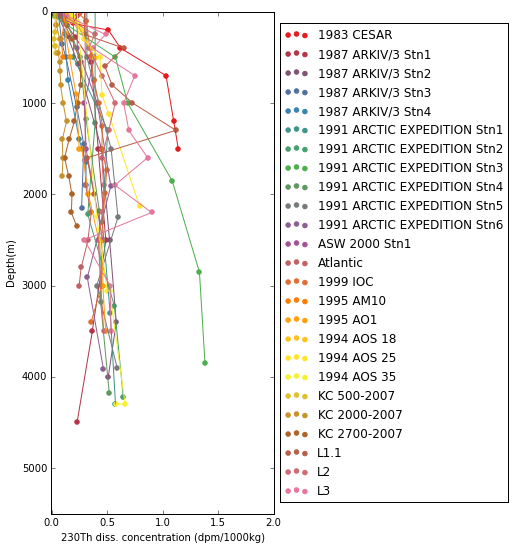

In [68]:
layer=np.empty([31,len(nc_filename)])
NEMO_dep=np.empty([31,len(nc_filename)])
Real_dep=np.empty([31,len(nc_filename)])
lons=np.empty([31,len(nc_filename)])
lats=np.empty([31,len(nc_filename)])
z=np.empty([31,len(nc_filename)])

for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    x= data['depth'];
    y=data['230Th diss.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    #name= data['name'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()

    
    xvals=np.linspace(0,np.max(x),3000)

    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(5,9))
    ax.hold(True)
    ax = plt.subplot()#4,4,j+1)
    ax.scatter(y,x, color=cm.Set1(j*9),label=name)
    ax.plot(yinterp2,xvals,color=cm.Set1(j*9))
    
for j in range(len(total)):
    
    data=pd.read_csv(total[j])
    x= data['depth'];
    y=data['230Th tot.']*0.9;
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    #name= data['name'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()
    if len(x)!=0:
        xvals=np.linspace(0,np.max(x),3000)
        yinterp2 = np.interp(xvals, x, y)
    
        ax = plt.figure(1,figsize=(5,5))
        ax.hold(True)
        ax = plt.subplot()#4,4,j+1)
        ax.scatter(y,x,color=cm.Set1((j+len(nc_filename))*9),label=name)
        ax.plot(yinterp2,xvals,color=cm.Set1((j+len(nc_filename))*9))
    if len(x)==0:
        print j
plt.xlabel('230Th diss. concentration (dpm/1000kg)')
plt.ylabel('Depth(m)')
plt.ylim([0,5500])
plt.xlim([-0.01,2.0])
#writecsv(j)
plt.legend(loc=0)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_yaxis()
plt.show()